<a href="https://colab.research.google.com/github/AsmeetaBardiya/Neural-Netwrok-Data-Analyst-Project/blob/main/NeuralNetwork_AsmeetaBardiya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
mat = np.array([[1,2,3],
                [4,5,6],
                [7,8,9]])

In [3]:
mat

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [4]:
tensor = tf.convert_to_tensor(mat)

In [5]:
tensor

<tf.Tensor: shape=(3, 3), dtype=int64, numpy=
array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])>

In [6]:
type(tensor)

tensorflow.python.framework.ops.EagerTensor

In [7]:
a = tf.constant(5) #or u can just do like tf.covert_to_tensor(5)
a

<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [8]:
name = tf.constant("Asmeeta Bardiya")    
name

<tf.Tensor: shape=(), dtype=string, numpy=b'Asmeeta Bardiya'>

In [9]:
type(name.numpy())

bytes

In [10]:
dir(name.numpy())

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'center',
 'count',
 'decode',
 'endswith',
 'expandtabs',
 'find',
 'fromhex',
 'hex',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdigit',
 'islower',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',
 'zfill']

In [11]:
name.numpy().decode()


'Asmeeta Bardiya'

In [12]:
type(name.numpy().decode())

str

In [13]:
data = tf.keras.datasets.fashion_mnist

In [14]:
(x_train,y_train),(x_test,y_test) = data.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [15]:
x_train.shape 

(60000, 28, 28)

In [16]:
class_names  = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'] 

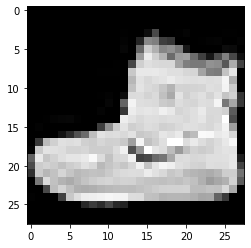

In [17]:
plt.imshow(x_train[0],cmap=plt.cm.binary_r)
plt.show()

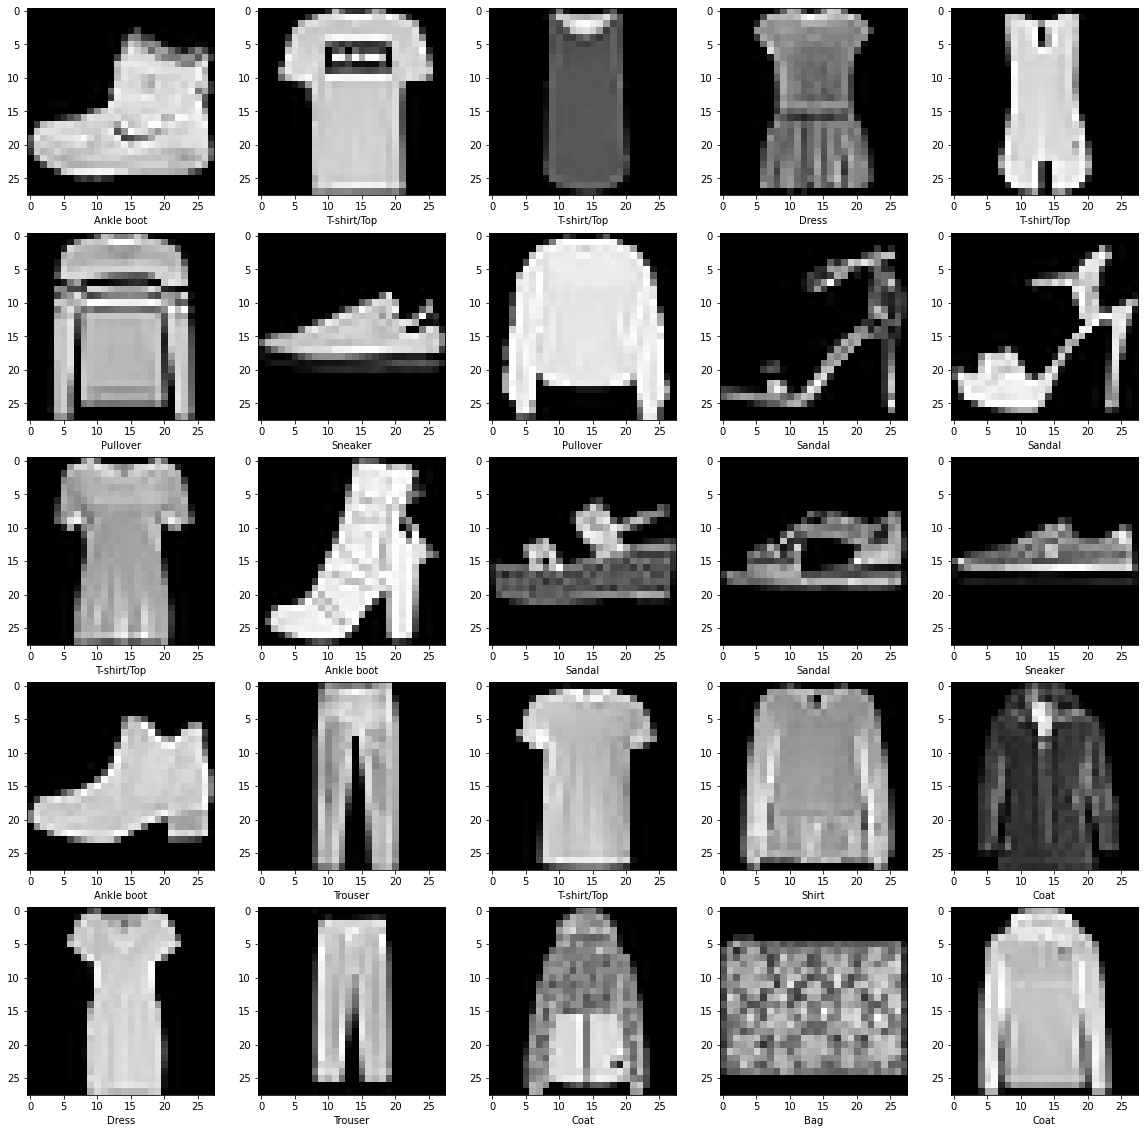

In [18]:
plt.figure(figsize=(20,20))
for num in range(25):
  plt.subplot(5,5,num+1)
  plt.imshow(x_train[num],cmap=plt.cm.binary_r)
  plt.xlabel(class_names[y_train[num]])
plt.show()

In [19]:
#Tensorflow Keras Sequential API
model = tf.keras.Sequential([
               tf.keras.layers.Flatten(input_shape=(28,28)),  
               tf.keras.layers.Dense(200,activation = 'relu'),    
               tf.keras.layers.Dense(10,activation = 'softmax')    
])

In [20]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train,y_train,epochs=10,verbose=1)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 4.0579 - accuracy: 0.7143
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6030 - accuracy: 0.7869
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5509 - accuracy: 0.8065
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5292 - accuracy: 0.8170
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5128 - accuracy: 0.8214
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4946 - accuracy: 0.8278
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4791 - accuracy: 0.8336
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4846 - accuracy: 0.8323
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4713 - accuracy: 0.8369
Epoch 10/10
1828/1875 [============================>.] - ETA: 0s - loss: 0.4745 - 

In [ ]:
model.evaluate(x_test,y_test,verbose=1)

In [ ]:
model.evaluate(x_test,y_test,verbose=1)

In [ ]:
img = x_test[10].reshape(1,28,28)

In [ ]:
pred = np.argmax(model.predict(img))
print(pred)

In [ ]:
plt.imshow(x_test[10],cmap=plt.cm.binary)
plt.show()

In [ ]:
class_names[pred]

In [ ]:
model.save('myfirstmodel.h5')